In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pandas as pd
import numpy as np
import tensorflow as tf

In [8]:
mnist = tf.keras.datasets.mnist

In [30]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

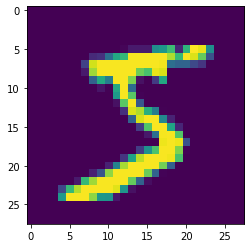

In [18]:
plt.imshow(X_train[0])
plt.show()

In [32]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [96]:
# build model

model = Sequential()
model.add(tf.keras.layers.Flatten())
model.add(Dense(units = 128, activation='relu'))
model.add(Dense(units = 128, activation='relu'))
model.add(Dense(units = 10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam',
             metrics=['accuracy'])

In [97]:
model.fit(x = X_train,
         y = y_train,
         epochs = 3,
         validation_data=(X_test, y_test),
         verbose = 1)

Epoch 1/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2649 - accuracy: 0.9226 - val_loss: 0.1404 - val_accuracy: 0.9585
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1098 - accuracy: 0.9666 - val_loss: 0.1081 - val_accuracy: 0.9658
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0737 - accuracy: 0.9772 - val_loss: 0.0857 - val_accuracy: 0.9729


In [100]:
model_loss = pd.DataFrame(model.history.history)

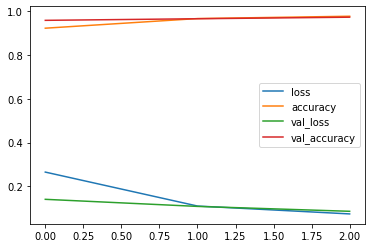

In [101]:
model_loss.plot()

In [102]:
val_loss, val_acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 748us/step - loss: 0.0857 - accuracy: 0.9729


In [103]:
print(val_loss, val_acc)

0.08572404086589813 0.9728999733924866


In [104]:
predictions = model.predict(X_test)

In [107]:
print(np.argmax(predictions[0]))

7


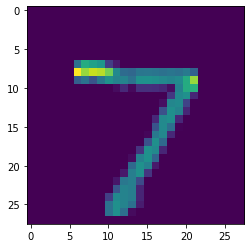

In [108]:
plt.imshow(X_test[0])
plt.show()